In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df1 = pd.read_csv("train.csv")
df2 = pd.read_csv("test.csv") 
dff = df2

In [3]:
df1.shape


(82657, 12)

In [4]:
df2.shape

(20665, 11)

In [5]:
df1.head(2)

user_name    country  \
0            NaN  Australia   
1  @wawinereport         US   

                                        review_title  \
0  Andrew Peace 2007 Peace Family Vineyard Chardo...   
1  North by Northwest 2014 Red (Columbia Valley (...   

                                  review_description            designation  \
0  Classic Chardonnay aromas of apple, pear and h...  Peace Family Vineyard   
1  This wine is near equal parts Syrah and Merlot...                    NaN   

   points  price         province                 region_1         region_2  \
0      83   10.0  Australia Other  South Eastern Australia              NaN   
1      89   15.0       Washington     Columbia Valley (WA)  Columbia Valley   

               winery     variety  
0        Andrew Peace  Chardonnay  
1  North by Northwest   Red Blend

In [6]:
df2.head(2)

user_name    country                                       review_title  \
0  @paulgwine          US  Boedecker Cellars 2011 Athena Pinot Noir (Will...   
1  @wineschach  Argentina  Mendoza Vineyards 2012 Gran Reserva by Richard...   

                                  review_description  \
0  Nicely differentiated from the companion Stewa...   
1  Charred, smoky, herbal aromas of blackberry tr...   

                      designation  points  price          province  \
0                          Athena      88   35.0            Oregon   
1  Gran Reserva by Richard Bonvin      90   60.0  Mendoza Province   

            region_1           region_2             winery  
0  Willamette Valley  Willamette Valley  Boedecker Cellars  
1            Mendoza                NaN  Mendoza Vineyards

In [7]:
df1.dtypes

user_name              object
country                object
review_title           object
review_description     object
designation            object
points                  int64
price                 float64
province               object
region_1               object
region_2               object
winery                 object
variety                object
dtype: object

In [8]:
df1.describe()

points         price
count  82657.000000  77088.000000
mean      88.544564     36.922232
std        3.099649     43.698346
min       80.000000      4.000000
25%       86.000000     18.000000
50%       88.000000     27.000000
75%       91.000000     45.000000
max      100.000000   3300.000000

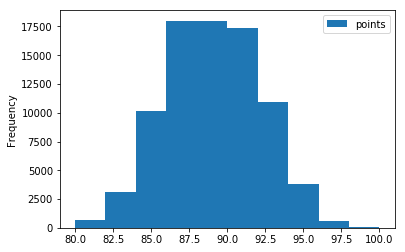

In [9]:
df1[['points']].plot.hist()

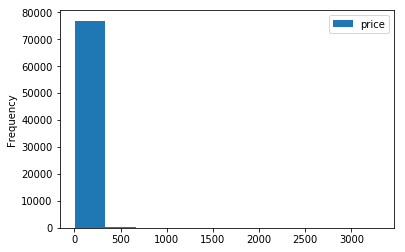

In [10]:
df1[['price']].plot.hist()

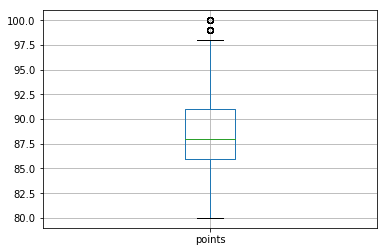

In [11]:
df1[['points']].boxplot()

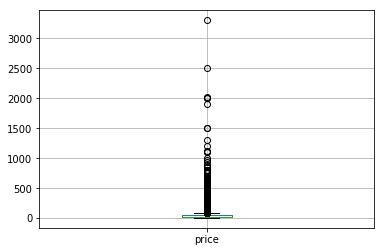

In [12]:
df1[['price']].boxplot()

In [13]:
df1['user_name'].value_counts()

@vossroger          17539
@wineschach          8320
@vboone              6908
@paulgwine           6824
@kerinokeefe         5675
@mattkettmann        4298
@wawinereport        3471
@JoeCz               3054
@gordone_cellars     2768
@AnneInVino          2314
@laurbuzz            1055
@suskostrzewa         511
@worldwineguys        503
@bkfiona               20
@winewchristina         4
Name: user_name, dtype: int64

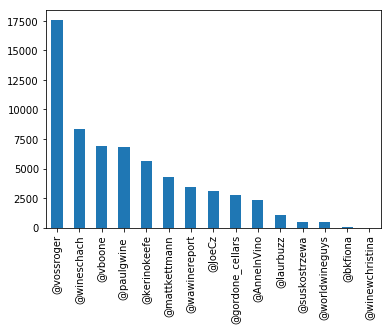

In [14]:
df1['user_name'].value_counts().plot.bar()

In [15]:
df1['country'].value_counts()

US                38573
France            15948
Italy              9112
Portugal           3197
Chile              2891
Spain              2755
Argentina          2570
Austria            1892
Germany            1573
New Zealand        1121
Australia          1028
South Africa        727
Israel              320
Canada              176
Greece              139
Bulgaria             93
Romania              80
England              62
Slovenia             42
Mexico               38
Hungary              35
Moldova              35
Turkey               33
Uruguay              33
Brazil               28
Lebanon              28
Morocco              21
Georgia              12
Croatia              12
Ukraine              11
Peru                  8
Cyprus                6
Switzerland           5
Luxembourg            5
Macedonia             5
Serbia                4
Czech Republic        3
India                 1
Name: country, dtype: int64

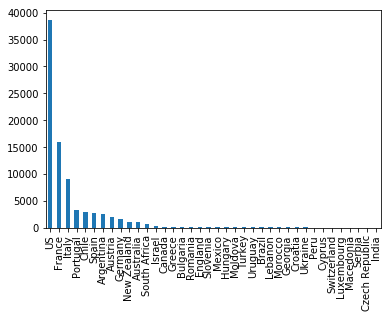

In [16]:
df1['country'].value_counts().plot.bar()

df1.dtypes

In [17]:
df1.shape

(82657, 12)

# Missing value treatment

In [18]:
df1.isnull().sum()

user_name             19393
country                  35
review_title              0
review_description        0
designation           23647
points                    0
price                  5569
province                 35
region_1              12754
region_2              46708
winery                    0
variety                   0
dtype: int64

In [19]:
df1['user_name'].fillna(df1['user_name'].mode()[0], inplace= True)

In [20]:
df1['country'].fillna(df1['country'].mode()[0], inplace= True)

In [21]:
df1['designation'].fillna(df1['designation'].mode()[0], inplace= True)
df1['region_1'].fillna(df1['region_1'].mode()[0], inplace= True)
df1['province'].fillna(df1['province'].mode()[0], inplace= True)

In [22]:
df1['price'].fillna(df1['price'].mean(), inplace= True)

# mising value treatement of test data set

In [23]:
df2.isnull().sum()

user_name              4738
country                   4
review_title              0
review_description        0
designation            5989
points                    0
price                  1394
province                  4
region_1               3314
region_2              11751
winery                    0
dtype: int64

In [24]:
df2.shape

(20665, 11)

In [25]:
df2['user_name'].fillna(df1['user_name'].mode()[0], inplace= True)

In [26]:
df2['country'].fillna(df1['country'].mode()[0], inplace= True)
df2['designation'].fillna(df1['designation'].mode()[0], inplace= True)
df2['province'].fillna(df1['province'].mode()[0], inplace= True)
df2['region_1'].fillna(df1['region_1'].mode()[0], inplace= True)

In [27]:
df2['price'].fillna(df1['price'].mean(), inplace= True)

# Outlier detection

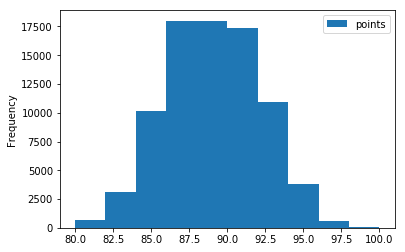

In [28]:
df1[["points"]].plot.hist()

In [29]:
df1.loc[df1["price"] > 50,"price"] = np.mean(df1["price"])

In [30]:
df1.loc[df1["points"] > 50,"points"] = np.mean(df1["points"])

# Now its time for model  building 

In [31]:
df1 = df1.drop(['region_2'], axis = 1)


In [32]:
df2 = df2.drop(['region_2'], axis = 1)

In [33]:
df1.head()

user_name    country  \
0     @vossroger  Australia   
1  @wawinereport         US   
2     @vossroger      Italy   
3     @vossroger     France   
4     @vossroger     France   

                                        review_title  \
0  Andrew Peace 2007 Peace Family Vineyard Chardo...   
1  North by Northwest 2014 Red (Columbia Valley (...   
2                  Renato Ratti 2007 Conca  (Barolo)   
3  Domaine l'Ancienne Cure 2010 L'Abbaye White (B...   
4  Château du Cèdre 2012 Le Cèdre Vintage Malbec ...   

                                  review_description            designation  \
0  Classic Chardonnay aromas of apple, pear and h...  Peace Family Vineyard   
1  This wine is near equal parts Syrah and Merlot...                Reserve   
2  Barolo Conca opens with inky dark concentratio...                  Conca   
3  It's impressive what a small addition of Sauvi...               L'Abbaye   
4  This ripe, sweet wine is rich and full of drie...       Le Cèdre Vintage   

      points      price          province                 region_1  \
0  88.544564  10.000000   Australia Other  South Eastern Australia   
1  88.544564  15.000000        Washington     Columbia Valley (WA)   
2  88.544564  36.922232          Piedmont                   Barolo   
3  88.544564  22.000000  Southwest France             Bergerac Sec   
4  88.544564  33.000000      France Other           Vin de Liqueur   

                    winery                     variety  
0             Andrew Peace                  Chardonnay  
1       North by Northwest                   Red Blend  
2             Renato Ratti                    Nebbiolo  
3  Domaine l'Ancienne Cure  Bordeaux-style White Blend  
4         Château du Cèdre                      Malbec

In [34]:
df1["province"].value_counts()

California                   25771
Washington                    6060
Bordeaux                      4690
Oregon                        3900
Tuscany                       3780
Burgundy                      3179
Mendoza Province              2287
Piedmont                      2226
New York                      1978
Alsace                        1664
Northern Spain                1448
Champagne                     1300
Loire Valley                  1026
Provence                       956
Douro                          951
Northeastern Italy             907
Southwest France               852
Mosel                          834
Beaujolais                     834
Catalonia                      794
Veneto                         656
Marlborough                    648
Rhône Valley                   628
Sicily & Sardinia              625
Alentejano                     623
South Australia                518
Colchagua Valley               483
Casablanca Valley              464
Virginia            

# changing variables to  numericals


In [35]:
ctry = {
    
'US'      :         0,
'France'   :         1,
'Italy'    :         3,
'Portugal'  :        4,
'Chile'      :        5,
'Spain'       :      6,
'Argentina'    :      7,
'Austria'     :      8,
'Germany'     :       9,
'New Zealand'  :      10,
'Australia'     :     11,
'South Africa':       12,
'Israel'   :          13,
'Canada'  :           14,
'Greece'   :          15,
'Bulgaria' :           16,
'Romania'  :            17,
'England'  :           18,
'Slovenia' :            19,
'Mexico'   :            20,
'Moldova' :             21,
'Hungary'  :            22,
'Uruguay'  :            23,
'Turkey'   :            24,
'Lebanon'  :           25,
'Brazil'   :           26,
'Morocco'  :           27,
'Croatia'  :           28,
'Georgia'  :           29,
'Ukraine' :            30,
'Peru'    :             31,
'Cyprus'  :             32,
'Macedonia'  :          33,
'Switzerland' :          34,
'Luxembourg'  :         35,
'Serbia'    :            36,
'Czech Republic' :      37,
'India'    :          38,
}

In [36]:
desig = {}
c_dg = 0
for item in df1['designation']:
    if item not in desig :
        desig[item] = c_dg
        c_dg = c_dg + 1 
    
   
desig2 = {}
c_dg2 = 0
for item2 in df2['designation']:
    if item2 not in desig2 :
        desig2[item2] = c_dg2
        c_dg2 = c_dg2 + 1 
    

In [37]:
user = {}
c_us = 0
for e in df1['user_name']:
    if e not in user :
        user[e] = c_us
        c_us = c_us + 1 
    
user2 = {}
c_us2 = 0
for e2 in df2['user_name']:
    if e2 not in user2 :
        user2[e2] = c_us2
        c_us2 = c_us2 + 1 
    

In [38]:
prov = {}
c_pr = 0
for i in df1['province']:
    if i not in prov :
        prov[i] = c_pr
        c_pr = c_pr + 1 

        
prov2 = {}
c_pr2 = 0
for i21 in df2['province']:
    if i21 not in prov2 :
        prov2[i21] = c_pr2
        c_pr2 = c_pr2 + 1

In [39]:
resion = {}
c_rj = 0
for i1 in df1['region_1']:
    if i1 not in resion :
        resion[i1] = c_rj
        c_rj = c_rj + 1 
 

resion2 = {}
c_rj2 = 0
for i12 in df2['region_1']:
    if i12 not in resion2 :
        resion2[i12] = c_rj2
        c_rj2 = c_rj2 + 1 
    

In [40]:
win = {}
c_win = 0
for i2 in df1['winery']:
    if i2 not in win :
        win[i2] = c_win
        c_win = c_win + 1 
        
win2 = {}
c_win2 = 0
for i22 in df2['winery']:
    if i22 not in win2 :
        win2[i22] = c_win2
        c_win2 = c_win2 + 1 
        


In [41]:
var = {}
c_var = 0
for i3 in df1['variety']:
    if i3 not in var :
        var[i3] = c_var
        c_var = c_var + 1

In [42]:
ctry2 = {}
c_ct = 0
for i4 in df2['country']:
    if i4 not in ctry2 :
        ctry2[i4] = c_ct
        c_ct = c_ct + 1

In [43]:
df1['variety'] = [var[item1] for item1 in df1['variety']]


In [44]:
df1['winery'] = [win[item2] for item2 in df1['winery']]


In [45]:
df1['region_1'] = [resion[item3] for item3 in df1['region_1']]


In [46]:
df1['province'] = [prov[item4] for item4 in df1['province']]


In [47]:
df1['designation'] = [desig[item5] for item5 in df1['designation']]


In [48]:
df1['country'] = [ctry[item6] for item6 in df1['country']]


In [49]:
df1['user_name'] = [user[item7] for item7 in df1['user_name']]


In [50]:
df2['winery'] = [win2[item11] for item11 in df2['winery']]

In [51]:
df2['region_1'] = [resion2[item12] for item12 in df2['region_1']]

In [52]:
df2['province'] = [prov2[item13] for item13 in df2['province']]

In [53]:
df2['designation'] = [desig2[item14] for item14 in df2['designation']]

In [54]:
df2['country'] = [ctry2[item15] for item15 in df2['country']]

In [55]:
df2['user_name'] = [user2[item16] for item16 in df2['user_name']]

In [56]:
df2.head(1)

user_name  country                                       review_title  \
0          0        0  Boedecker Cellars 2011 Athena Pinot Noir (Will...   

                                  review_description  designation  points  \
0  Nicely differentiated from the companion Stewa...            0      88   

   price  province  region_1  winery  
0   35.0         0         0       0

In [57]:
df1.head(1)

user_name  country                                       review_title  \
0          0       11  Andrew Peace 2007 Peace Family Vineyard Chardo...   

                                  review_description  designation     points  \
0  Classic Chardonnay aromas of apple, pear and h...            0  88.544564   

   price  province  region_1  winery  variety  
0   10.0         0         0       0        0

# Removing unwanted columns from df1 and df2

In [58]:
df1 = df1.drop(['review_title', 'review_description'], axis = 1)


In [59]:
df2 = df2.drop(['review_title', 'review_description'], axis = 1)

In [60]:
x_train = df1.drop(['variety'], axis = 1)
y_train = df1['variety']

In [61]:
x_test = df2

In [62]:
x_test.head(2)

user_name  country  designation  points  price  province  region_1  winery
0          0        0            0      88   35.0         0         0       0
1          1        1            1      90   60.0         1         1       1

In [63]:
x_train.head(2)

user_name  country  designation     points  price  province  region_1  \
0          0       11            0  88.544564   10.0         0         0   
1          1        0            1  88.544564   15.0         1         1   

   winery  
0       0  
1       1

In [64]:
from sklearn import tree

lreg = tree.DecisionTreeClassifier()

In [65]:
lreg.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [66]:
pred = lreg.predict(x_test)

In [67]:
o_pred = np.array(pred).tolist()

In [68]:
for i in range(len(o_pred)):
    item = o_pred[i]
    for each in var:
        if var[each] == item:
            o_pred[i] = each

In [69]:
pred_f= np.asarray(o_pred)

In [70]:
dff['variety'] =pred_f 

In [71]:
dff.head(100)

user_name    country  \
0        @paulgwine          US   
1        @wineschach  Argentina   
2            @vboone         US   
3        @wineschach  Argentina   
4       @kerinokeefe      Italy   
5         @vossroger         US   
6         @vossroger     France   
7            @vboone         US   
8        @wineschach      Chile   
9       @kerinokeefe      Italy   
10       @paulgwine          US   
11        @vossroger     France   
12        @vossroger     France   
13     @wawinereport         US   
14       @paulgwine          US   
15        @vossroger    Austria   
16           @vboone         US   
17     @mattkettmann         US   
18       @paulgwine          US   
19        @vossroger     France   
20        @vossroger         US   
21       @paulgwine          US   
22       @wineschach      Spain   
23        @vossroger   Portugal   
24        @vossroger         US   
25         @laurbuzz     France   
26           @vboone         US   
27        @vossroger     France   
28           @vboone         US   
29        @vossroger      Italy   
..               ...        ...   
70        @vossroger     France   
71       @AnneInVino     France   
72        @vossroger         US   
73      @kerinokeefe      Italy   
74           @vboone         US   
75        @vossroger   Portugal   
76       @paulgwine          US   
77      @kerinokeefe      Italy   
78        @vossroger         US   
79     @mattkettmann         US   
80        @vossroger         US   
81  @gordone_cellars         US   
82       @wineschach      Chile   
83      @kerinokeefe      Italy   
84        @vossroger      Chile   
85     @wawinereport         US   
86        @vossroger     France   
87     @mattkettmann         US   
88           @vboone         US   
89       @paulgwine          US   
90       @paulgwine          US   
91       @AnneInVino    Austria   
92        @vossroger     France   
93        @vossroger         US   
94           @vboone         US   
95     @wawinereport         US   
96         @laurbuzz     France   
97       @AnneInVino     France   
98           @vboone         US   
99           @vboone         US   

                                         review_title  \
0   Boedecker Cellars 2011 Athena Pinot Noir (Will...   
1   Mendoza Vineyards 2012 Gran Reserva by Richard...   
2                 Prime 2013 Chardonnay (Coombsville)   
3   Bodega Cuarto Dominio 2012 Chento Vineyard Sel...   
4            SassodiSole 2012  Brunello di Montalcino   
5   Mount Pleasant Winery NV Villagio Off Dry Whit...   
6   Château Trolliet Lafite 2010 Red (Côtes de Ber...   
7   Dry Creek Vineyard 2013 Cabernet Sauvignon (Dr...   
8   Viña Casas Patronales 2010 Mixtura Red (Maule ...   
9   Contadi Castaldi NV Rosé Sparkling (Franciacorta)   
10  Spindrift Cellars 2011 Pinot Noir (Willamette ...   
11          Eric Taillet NV Egali't Brut  (Champagne)   
12                        Bougrier 2013  Rosé d'Anjou   
13      Almquist 2013 Pinot Noir (Horse Heaven Hills)   
14  Brittan Vineyards 2014 Gestalt Block Pinot Noi...   
15  Bründlmayer 2009 Steinmassel Trockenbeerenausl...   
16  Mounts 2014 Estate Grown Cabernet Sauvignon (D...   
17                  HammerSky 2013 Rosé (Paso Robles)   
18  Novelty Hill 2009 Stillwater Creek Vineyard Ca...   
19           Olivier Leflaive 2006  Bâtard-Montrachet   
20              Schug 1999 Pinot Noir (Sonoma Valley)   
21                 Lenné Estate 2014 LeNez Pinot Noir   
22                Cruz 2011 Sagra  (Ribera del Duero)   
23  Wines & Winemakers 2014 Casa Ermelinda Freitas...   
24        Butterfly Kiss 2010 Chardonnay (California)   
25  Les Collines du Bourdic 2016 Éclat de Gris Ros...   
26  Medlock Ames 2013 Heritage Merlot (Alexander V...   
27                 Pierre Gruber 2015  Mâcon-Villages   
28         Decoy 2015 Sauvignon Blanc (Sonoma County)   
29                   Montevetrano 2008 Red (Campania)   
..                                                ...   
70  Château Cand

In [72]:
submission = pd.DataFrame({
        "user": x_test["user_name"],
        "variety": pred_f
    })
submission.to_csv('submission.csv', index=False)

# Calculating the eavaluation parameter

In [73]:
dff['variety'].value_counts()

Red Blend                     3676
Chardonnay                    2257
Cabernet Sauvignon            1645
Pinot Noir                    1611
Syrah                         1040
White Blend                   1028
Sauvignon Blanc                915
Malbec                         907
Bordeaux-style Red Blend       815
Rhône-style Red Blend          703
Sparkling Blend                686
Merlot                         657
Riesling                       635
Bordeaux-style White Blend     525
Rosé                           511
Cabernet Franc                 414
Sangiovese                     390
Pinot Grigio                   356
Grüner Veltliner               323
Portuguese Red                 311
Tempranillo                    297
Portuguese White               233
Pinot Gris                     225
Zinfandel                      166
Nebbiolo                       164
Gewürztraminer                  96
Champagne Blend                 59
Gamay                           20
Name: variety, dtype